In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

Missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,False
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False


In [4]:
target_column = 'price'
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 305500.10219213954
Mean Squared Error (MSE): 1157218002923.887
R² Score: -0.13469839272573125


In [7]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3366,street_4442 95th Ave NE,3.102971e+06
58,date_2014-06-18 00:00:00,2.870451e+06
2542,street_2826 21st Ave W,2.199135e+06
896,street_14070 Military Rd S,1.939599e+06
480,street_12 Columbia Key,1.491725e+06
...,...,...
4252,street_820 S 300th St,-2.764661e+06
3292,street_4280 E Lake Sammamish Pkwy SE,-2.776715e+06
1905,street_21502 NE 103rd St,-2.883786e+06
3829,street_6316 26th Ave NW,-2.885048e+06


In [9]:
# Check all available feature names
print(X_test.columns)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4724)


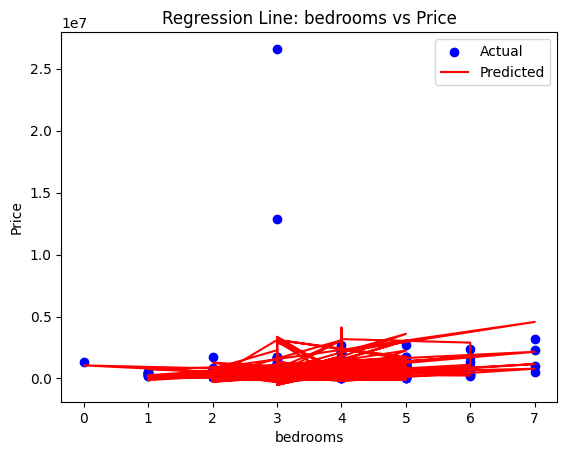

In [13]:
feature = 'bedrooms'  
plt.scatter(X_test[feature], y_test, color='blue', label='Actual')
plt.plot(X_test[feature], model.predict(X_test), color='red', label='Predicted')
plt.xlabel(feature)
plt.ylabel('Price')
plt.title(f'Regression Line: {feature} vs Price')
plt.legend()
plt.show()